# Введение в искусственные нейронные сети
# Урок 2. Keras

## Практическое задание

Используем набор примеров fashion-MNIST

1.  Опишите - какой результата получен в нейросети в зависимости от:
  -  числа нейронов в слое(для 2-хслойной сети), 
  - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).
  - фиксируйте для тренировочного и тестового набора метрики accuracy.
2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе? 

4. Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность). Сделайте вывод.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras

from keras.datasets import fashion_mnist  # наборы для работы
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical

(train_imagesi,train_labels),(test_imagesi,test_labels) = fashion_mnist.load_data()

# Normalize the images.
train_imagesi = (train_imagesi / 127) - 1
test_imagesi = (test_imagesi / 127) - 1

# Flatten the images.
train_images = train_imagesi.reshape((-1, 784))
test_images = test_imagesi.reshape((-1, 784))

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


Загрузка Fashion_MNIST

In [3]:
class_names = ["Футболка / топ", "Шорты", "Свитер", 
               "Платье", "Плащ", "Сандали", "Рубашка",
               "Кроссовок", "Сумка", "Ботинок"]


In [4]:
train_imagesi.shape

(60000, 28, 28)

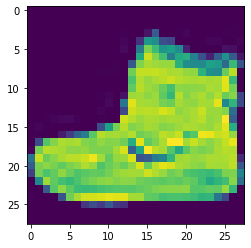

Ботинок


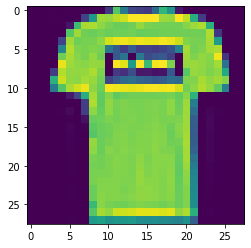

Футболка / топ


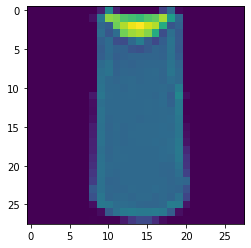

Футболка / топ


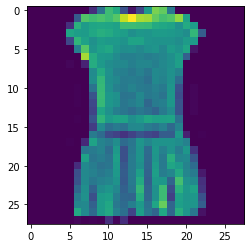

Платье


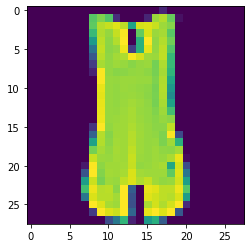

Футболка / топ


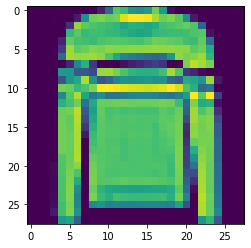

Свитер


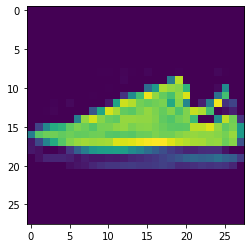

Кроссовок


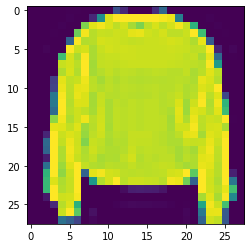

Свитер


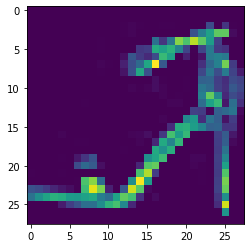

Сандали


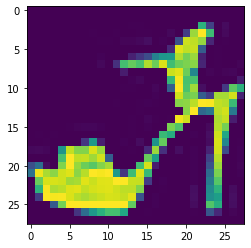

Сандали


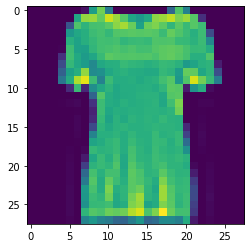

Футболка / топ


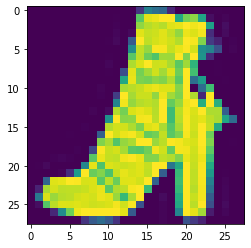

Ботинок


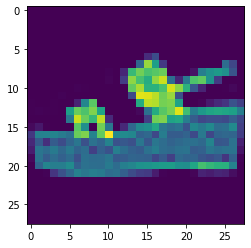

Сандали


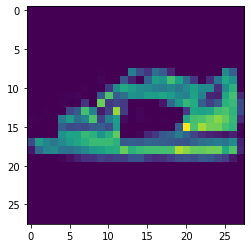

Сандали


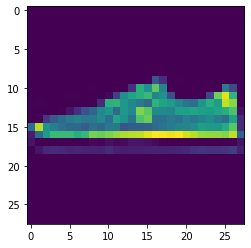

Кроссовок


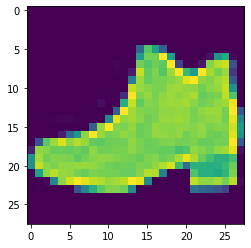

Ботинок


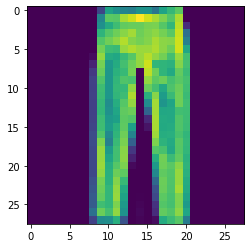

Шорты


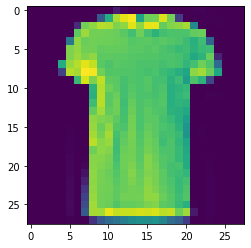

Футболка / топ


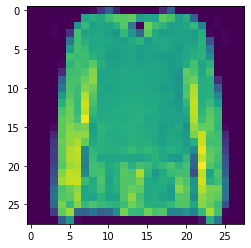

Рубашка


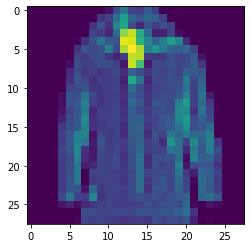

Плащ


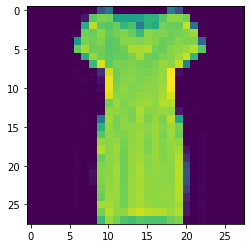

Платье


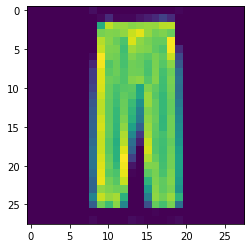

Шорты


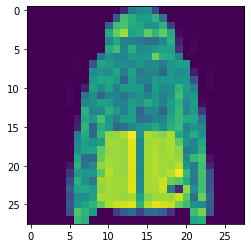

Плащ


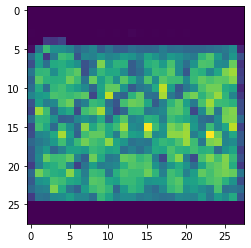

Сумка


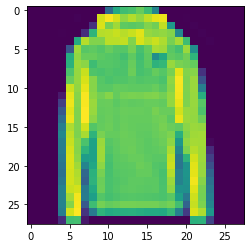

Плащ


In [5]:
for _ in range(25):
  plt.imshow(train_imagesi[_,:,:])
  plt.show()
  print(class_names[train_labels[_]])

In [6]:
keras.backend.backend()

'tensorflow'

**Создание модели**

In [7]:
models_dict = {"models_is": [2, 3, 5, 10], "models": {"models_2": [], "models_3": [], "models_5": [], "models_10": []}}
preds_dict = {"model_names": [], "y_preds": [], "y_classes": []}

Размер набора входных данных для обучения 

In [8]:
train_images.shape

(60000, 784)

In [9]:
for _ in range(4):
  for _i in models_dict["models_is"]:
    model = Sequential(name=f'model_{_i}_{_}')
    model.add(Dense(128, activation='relu', input_shape=(784,)))  
    # входной слой + поносвязный слой из 128 нейронов с активацией ReLU
    for k in range(_i):
      model.add(Dense(10+(10-k)*10, activation='tanh')) 
      # Скрытый слой k из 10+(10-k)*10 нейронов с активацией tanh
    model.add(Dense(10, activation='softmax')) 
    # выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
    model.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy'],
    )
    models_dict["models"][f"models_{_i}"].append(model)

In [10]:
for _i in models_dict["models_is"]:
    print(len(models_dict['models'][f'models_{_i}']))

4
4
4
4


In [11]:
for model in models_dict["models"].keys():
  models_dict["models"][model][0].summary()

Model: "model_2_0"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 110)               14190     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               11100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 126,780
Trainable params: 126,780
Non-trainable params: 0
_________________________________________________________________
Model: "model_3_0"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               100480    
________________________________

Можно подсмотреть как наша модель описана после ее создания

In [12]:
for model in models_dict["models"].keys():
  print(models_dict["models"][model][0].get_config())

{'name': 'model_2_0', 'layers': [{'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 784), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'dense_input'}}, {'class_name': 'Dense', 'config': {'name': 'dense', 'trainable': True, 'batch_input_shape': (None, 784), 'dtype': 'float32', 'units': 128, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'class_name': 'Dense', 'config': {'name': 'dense_1', 'trainable': True, 'dtype': 'float32', 'units': 110, 'activation': 'tanh', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regula

Превратим выходы в векторые (OHE в keras - from keras.utils import to_categorical)

In [13]:
train_labels[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [14]:
y_t = to_categorical(train_labels)
y_tt = to_categorical(test_labels)

In [15]:
y_t[:3,:]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [16]:
for models in models_dict["models"].items():
  for model in models[1]:
    print(model.get_config()["name"])
  print(_[1])

model_2_0
model_2_1
model_2_2
model_2_3
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
model_3_0
model_3_1
model_3_2
model_3_3
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
model_5_0
model_5_1
model_5_2
model_5_3
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
model_10_0
model_10_1
model_10_2
model_10_3
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Предсказания модели до обучения

In [17]:
for models in models_dict["models"].items():
  for model in models[1]:
    print(model.get_config()["name"])
    y_pred = model.predict(test_images[:3,:])
    y_class = np.argmax(y_pred, axis=1)
    preds_dict["model_names"].append(model.get_config()["name"])
    preds_dict["y_preds"].append(y_pred)
    preds_dict["y_classes"].append(y_class)
preds_dict

model_2_0
model_2_1
model_2_2
model_2_3
model_3_0
model_3_1
model_3_2
model_3_3
model_5_0
model_5_1
model_5_2
model_5_3
model_10_0
model_10_1
model_10_2
model_10_3


{'model_names': ['model_2_0',
  'model_2_1',
  'model_2_2',
  'model_2_3',
  'model_3_0',
  'model_3_1',
  'model_3_2',
  'model_3_3',
  'model_5_0',
  'model_5_1',
  'model_5_2',
  'model_5_3',
  'model_10_0',
  'model_10_1',
  'model_10_2',
  'model_10_3'],
 'y_classes': [array([7, 6, 7]),
  array([8, 9, 2]),
  array([4, 4, 4]),
  array([0, 1, 1]),
  array([7, 2, 3]),
  array([3, 0, 4]),
  array([3, 0, 7]),
  array([4, 4, 3]),
  array([7, 7, 0]),
  array([3, 9, 1]),
  array([2, 2, 4]),
  array([2, 5, 2]),
  array([0, 9, 3]),
  array([6, 5, 6]),
  array([3, 5, 6]),
  array([3, 4, 3])],
 'y_preds': [array([[0.09498473, 0.0738775 , 0.06784974, 0.08495968, 0.09047209,
          0.10405912, 0.15496062, 0.17230074, 0.09554008, 0.06099572],
         [0.02682721, 0.04187514, 0.08809937, 0.11575841, 0.04796205,
          0.1145266 , 0.18384884, 0.13677984, 0.09149502, 0.15282753],
         [0.05867421, 0.12160535, 0.09878406, 0.05227471, 0.09021334,
          0.06811313, 0.16891639, 0.1765182

Сделаем цикл тренировки модели

In [18]:
for models in models_dict["models"].items():
  for model in models[1]:
    # Train the model.
    model.fit(  
      train_images[:,:],
      y_t[:,:],
      epochs=15,
      batch_size=32,
      validation_split=0.2
    )

    # Evaluate the model.
    model.evaluate( 
      test_images,
      y_tt
    )

    # Predict on the first 5 test images.
    predictions = model.predict(test_images[:5])

    # Print our model's predictions.
    print(np.argmax(predictions, axis=1)) # 

    # Check our predictions against the ground truths.
    print(test_labels[:5]) # 

Epoch 1/15
1500/1500 [==============================] - 14s 4ms/step - loss: 0.6081 - accuracy: 0.7825 - val_loss: 0.4346 - val_accuracy: 0.8418
Epoch 2/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3967 - accuracy: 0.8551 - val_loss: 0.3779 - val_accuracy: 0.8593
Epoch 3/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3500 - accuracy: 0.8715 - val_loss: 0.3670 - val_accuracy: 0.8658
Epoch 4/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3165 - accuracy: 0.8822 - val_loss: 0.3671 - val_accuracy: 0.8689
Epoch 5/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3075 - accuracy: 0.8844 - val_loss: 0.3585 - val_accuracy: 0.8737
Epoch 6/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2868 - accuracy: 0.8931 - val_loss: 0.3258 - val_accuracy: 0.8839
Epoch 7/15
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2703 - accuracy: 0.8978 - val_loss: 0.3514 - val_accuracy

In [19]:
preds_dict["fit_model_names"] = []
preds_dict["fit_y_preds"] = []
preds_dict["fit_y_classes"] = []
for models in models_dict["models"].items():
  for model in models[1]:
    print(model.get_config()["name"])
    y_pred = model.predict(test_images[:3,:])
    y_class = np.argmax(y_pred, axis=1)
    preds_dict["fit_model_names"].append(model.get_config()["name"])
    preds_dict["fit_y_preds"].append(y_pred)
    preds_dict["fit_y_classes"].append(y_class)
preds_dict

model_2_0
model_2_1
model_2_2
model_2_3
model_3_0
model_3_1
model_3_2
model_3_3
model_5_0
model_5_1
model_5_2
model_5_3
model_10_0
model_10_1
model_10_2
model_10_3


{'fit_model_names': ['model_2_0',
  'model_2_1',
  'model_2_2',
  'model_2_3',
  'model_3_0',
  'model_3_1',
  'model_3_2',
  'model_3_3',
  'model_5_0',
  'model_5_1',
  'model_5_2',
  'model_5_3',
  'model_10_0',
  'model_10_1',
  'model_10_2',
  'model_10_3'],
 'fit_y_classes': [array([9, 2, 1]),
  array([9, 2, 1]),
  array([9, 2, 1]),
  array([9, 2, 1]),
  array([9, 2, 1]),
  array([9, 2, 1]),
  array([9, 2, 1]),
  array([9, 2, 1]),
  array([9, 2, 1]),
  array([9, 2, 1]),
  array([9, 2, 1]),
  array([9, 2, 1]),
  array([9, 2, 1]),
  array([9, 2, 1]),
  array([9, 2, 1]),
  array([9, 2, 1])],
 'fit_y_preds': [array([[2.0739755e-07, 4.8544177e-07, 2.0310514e-08, 1.6959336e-07,
          6.5686564e-08, 3.3739829e-04, 2.3997262e-07, 2.2408126e-02,
          1.5171504e-05, 9.7723812e-01],
         [2.1410959e-04, 2.8400302e-07, 9.8791879e-01, 1.2769099e-05,
          8.1254756e-03, 3.5519446e-07, 3.7221417e-03, 9.3644661e-07,
          3.0590738e-06, 2.1856667e-06],
         [1.0329978e-

Сохраним модель на диск

In [20]:
# сохранить веса модели.
for models in models_dict["models"].items():
  for model in models[1]:
    
    model.save_weights(f"{model.get_config()['name']}_weights.h5")

# загрузить веса модели:
# model.load_weights('model.h5')


In [21]:
for models in models_dict["models"].items():
  for model in models[1]:
    model.evaluate(
      test_images,
      to_categorical(test_labels)
    )

313/313 [==============================] - 1s 4ms/step - loss: 0.3942 - accuracy: 0.8636


In [22]:
for models in models_dict["models"].items():
  for model in models[1]:
    print(model.get_config()["name"])

model_2_0
model_2_1
model_2_2
model_2_3
model_3_0
model_3_1
model_3_2
model_3_3
model_5_0
model_5_1
model_5_2
model_5_3
model_10_0
model_10_1
model_10_2
model_10_3


In [23]:
# Train the model. Вернем результаты по потерям и метрикам для всех эпох в hh 
hh_dict =  {"hh_models": [], "models_names": []}
for models in models_dict["models"].items():
  for model in models[1]:
    hh_dict["models_names"].append(model.get_config()["name"])
    hh_dict['hh_models'].append(model.fit( 
      train_images,
      to_categorical(train_labels),
      epochs=15,
      batch_size=32, validation_split=0.2
    ))

    # Evaluate the model.
    model.evaluate(
      test_images,
      to_categorical(test_labels)
    )

    # Predict on the first 5 test images.
    predictions = model.predict(test_images[:5])

    # Print our model's predictions.
    print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

    # Check our predictions against the ground truths.
    print(test_labels[:5]) # [7, 2, 1, 0, 4]

Epoch 1/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2059 - accuracy: 0.9228 - val_loss: 0.3549 - val_accuracy: 0.8778
Epoch 2/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2003 - accuracy: 0.9249 - val_loss: 0.3323 - val_accuracy: 0.8904
Epoch 3/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1938 - accuracy: 0.9285 - val_loss: 0.3492 - val_accuracy: 0.8813
Epoch 4/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1883 - accuracy: 0.9300 - val_loss: 0.3466 - val_accuracy: 0.8873
Epoch 5/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1834 - accuracy: 0.9320 - val_loss: 0.3478 - val_accuracy: 0.8877
Epoch 6/15
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1807 - accuracy: 0.9330 - val_loss: 0.3551 - val_accuracy: 0.8893
Epoch 7/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1766 - accuracy: 0.9341 - val_loss: 0.3662 - val_accuracy:

In [24]:
for models in models_dict["models"].items():
  for model in models[1]:
    print(model.get_config()['name'])
    model.fit(
        train_images,
        y_t,
        epochs=3,
        batch_size=1024,
        validation_split=0.2
        )

model_2_0
Epoch 1/3
47/47 [==============================] - 1s 9ms/step - loss: 0.1209 - accuracy: 0.9557 - val_loss: 0.3560 - val_accuracy: 0.8960
Epoch 2/3
47/47 [==============================] - 0s 8ms/step - loss: 0.0964 - accuracy: 0.9663 - val_loss: 0.3573 - val_accuracy: 0.8957
Epoch 3/3
47/47 [==============================] - 0s 7ms/step - loss: 0.0892 - accuracy: 0.9697 - val_loss: 0.3606 - val_accuracy: 0.8958
model_2_1
Epoch 1/3
47/47 [==============================] - 1s 9ms/step - loss: 0.1231 - accuracy: 0.9550 - val_loss: 0.3441 - val_accuracy: 0.8965
Epoch 2/3
47/47 [==============================] - 0s 8ms/step - loss: 0.1010 - accuracy: 0.9639 - val_loss: 0.3467 - val_accuracy: 0.8963
Epoch 3/3
47/47 [==============================] - 0s 7ms/step - loss: 0.0947 - accuracy: 0.9670 - val_loss: 0.3500 - val_accuracy: 0.8955
model_2_2
Epoch 1/3
47/47 [==============================] - 1s 8ms/step - loss: 0.1216 - accuracy: 0.9561 - val_loss: 0.3483 - val_accuracy: 0.89

In [25]:
models_dict["models"]['models_5'][3].get_config()['name']

'model_5_3'

Покажем как выглядит кривая обучения

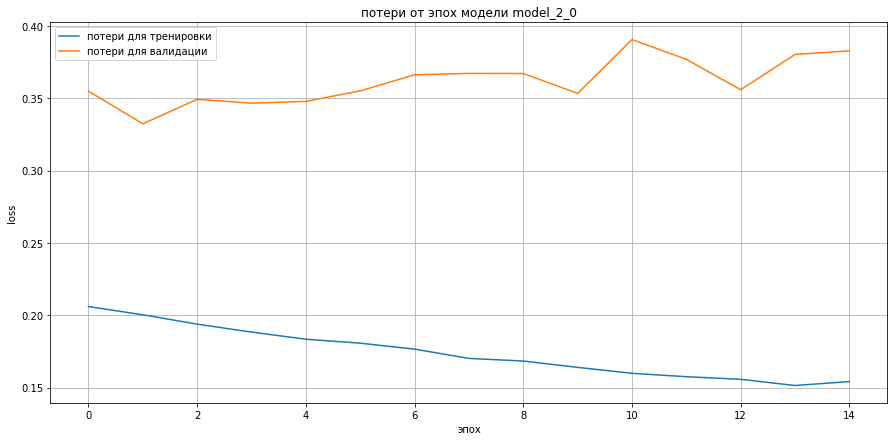

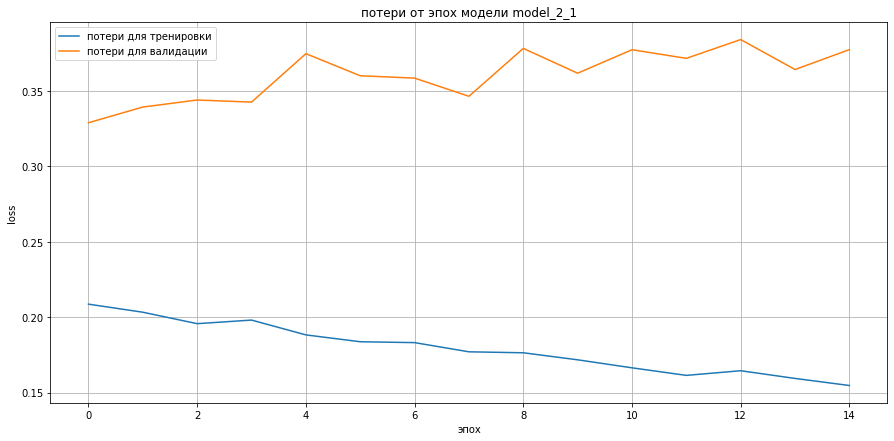

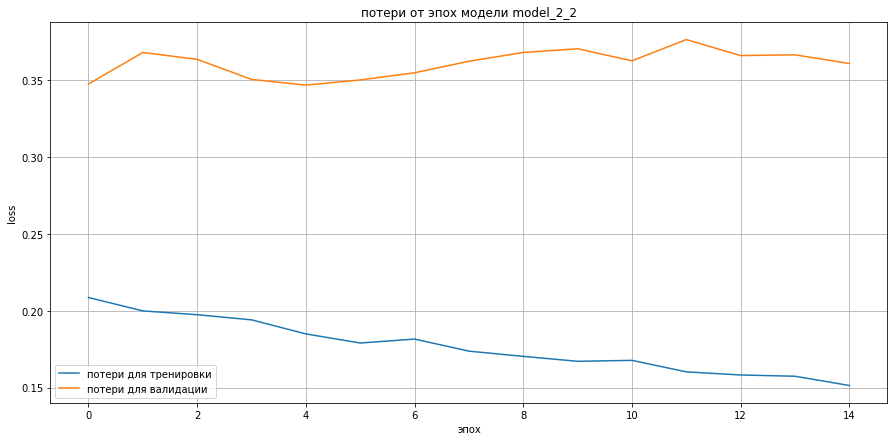

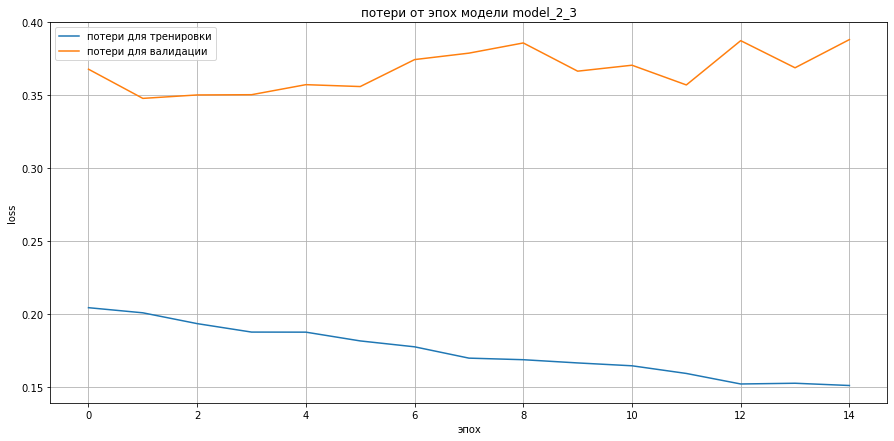

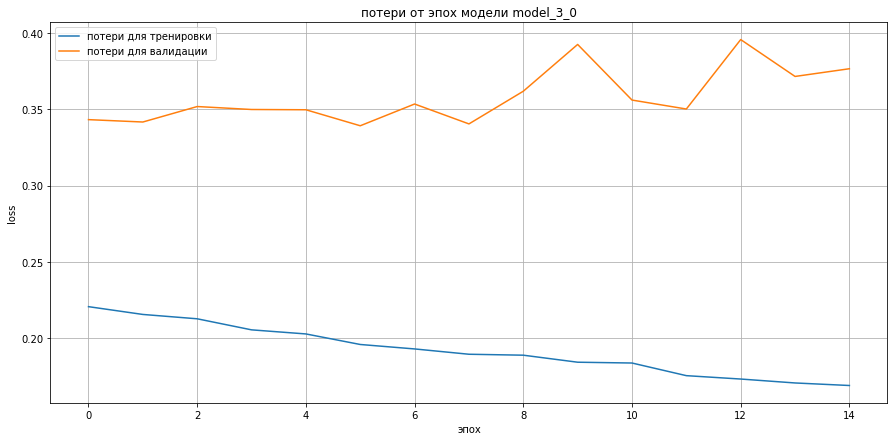

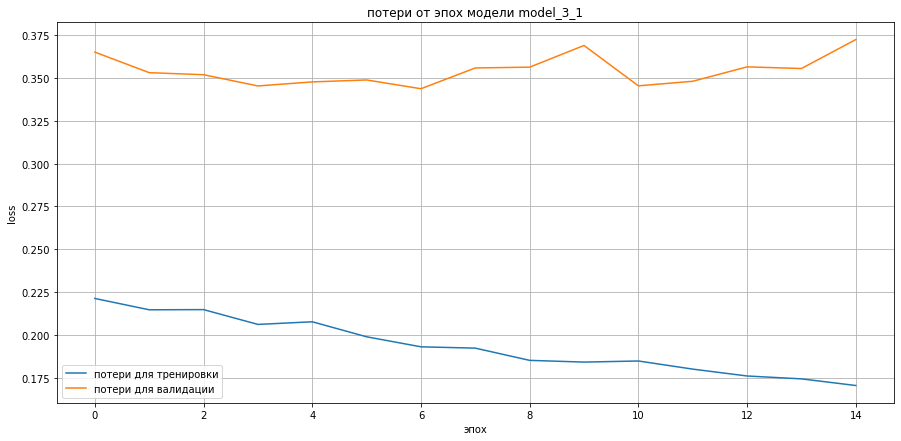

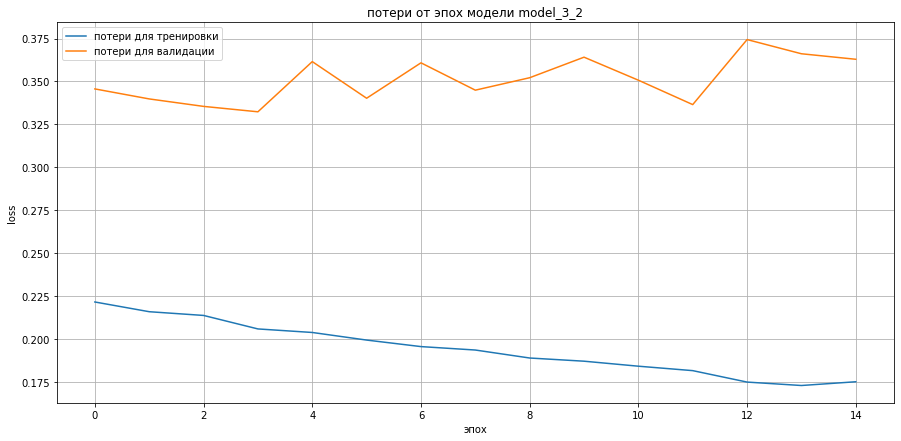

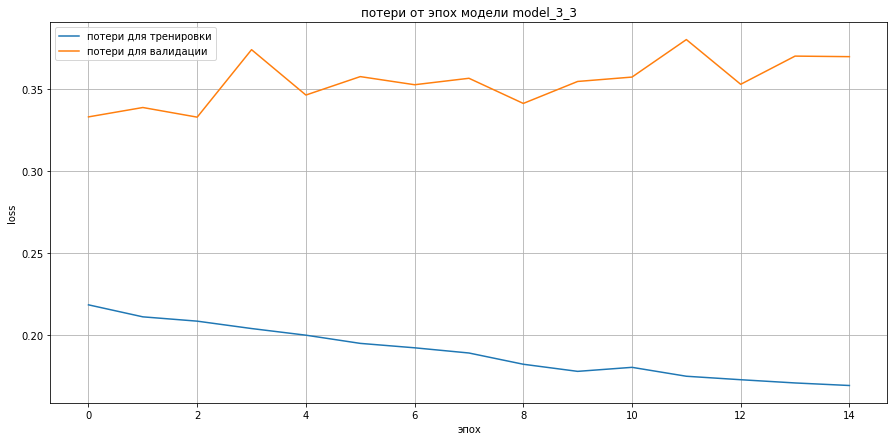

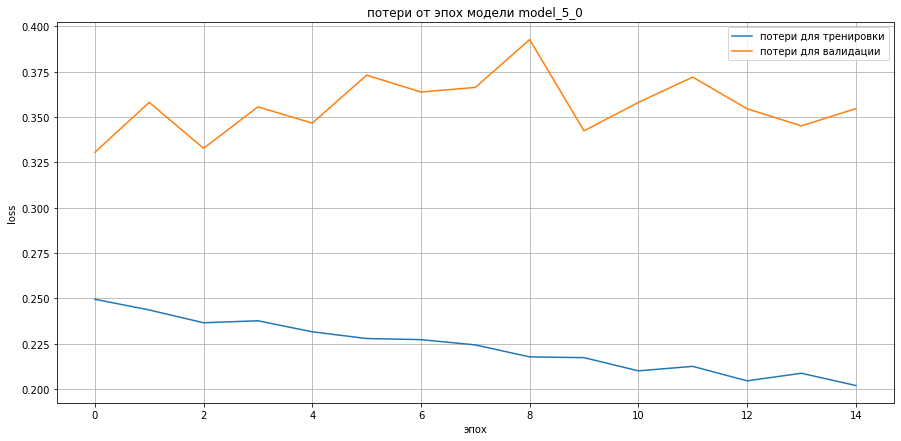

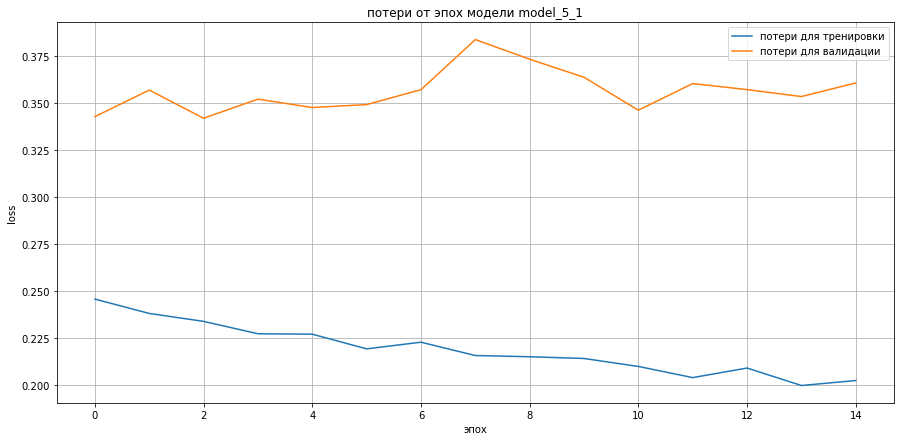

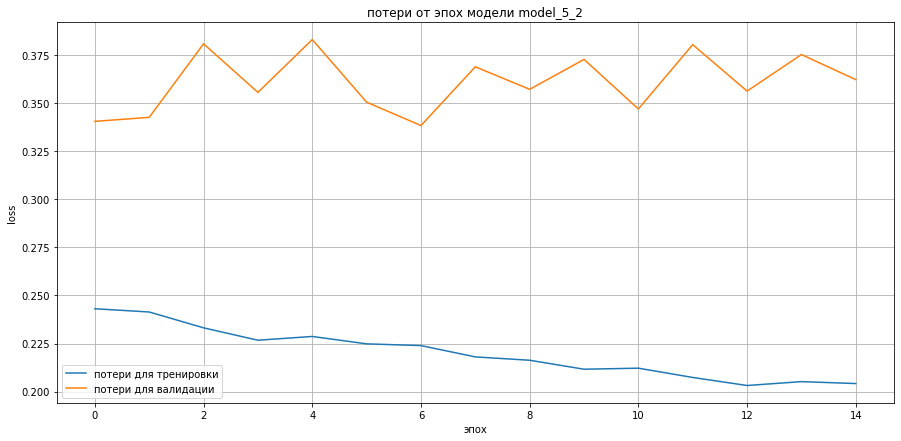

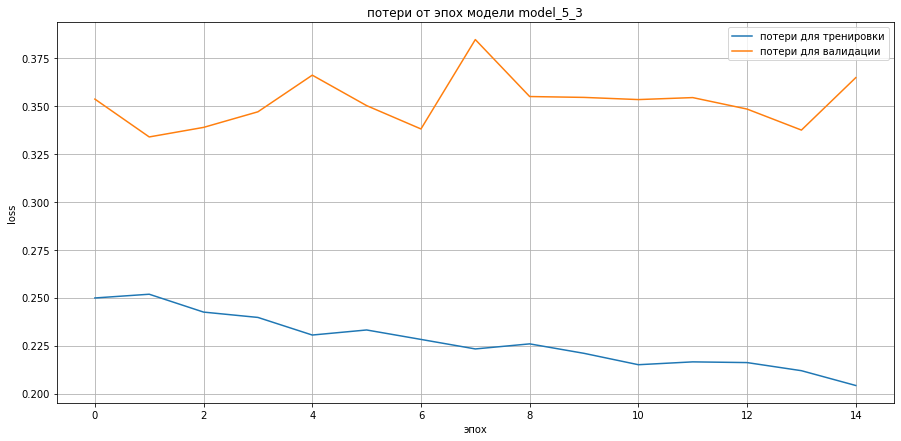

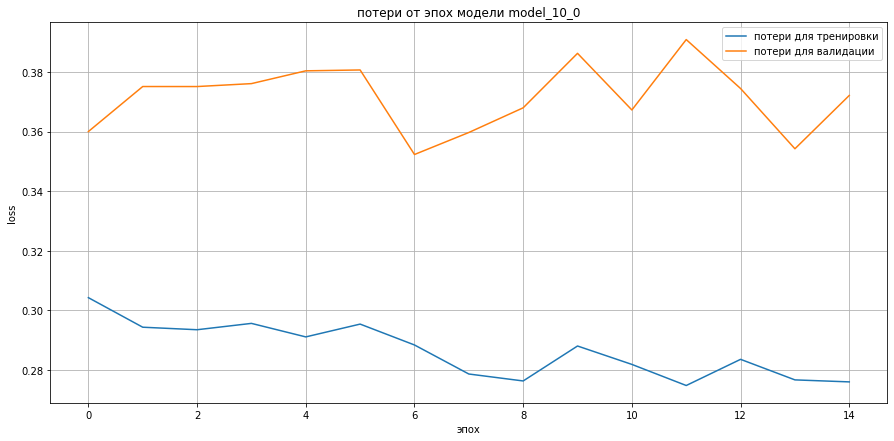

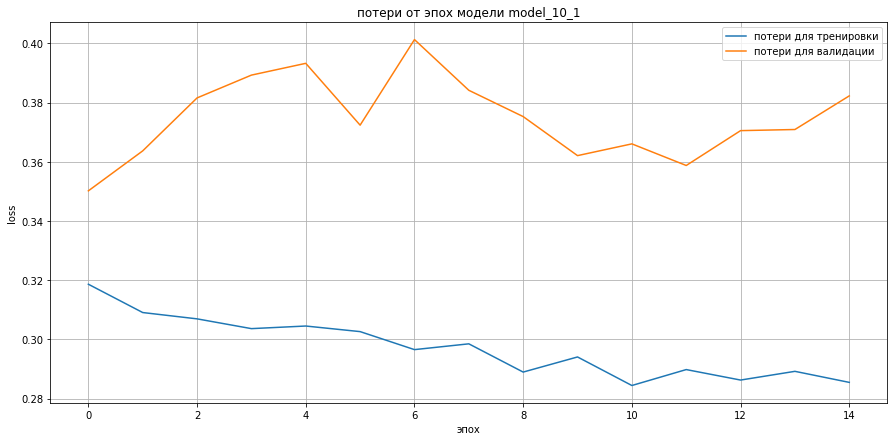

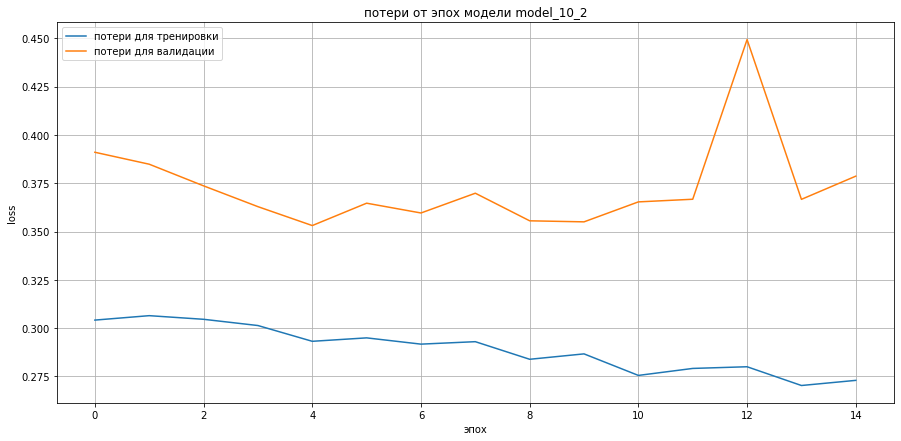

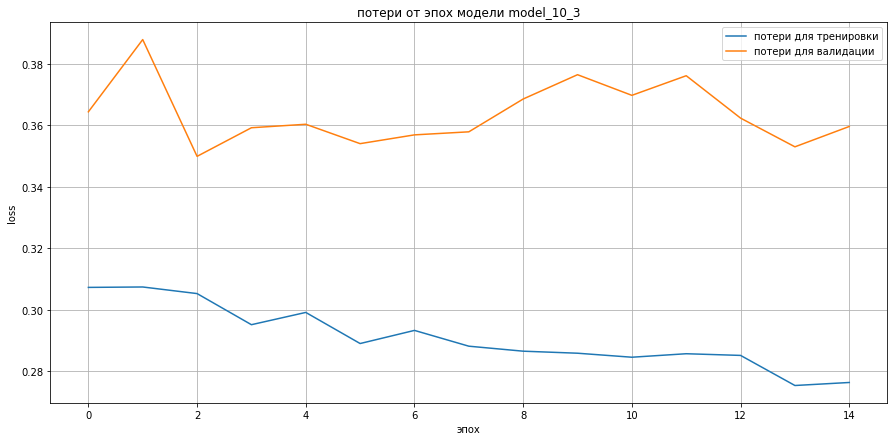

In [26]:
min_val_loss = 1
for itm in range(len(hh_dict["hh_models"])):
  plt.figure(figsize=(15,7))
  plt.plot(hh_dict["hh_models"][itm].history['loss'], label = 'потери для тренировки')
  plt.plot(hh_dict["hh_models"][itm].history['val_loss'], label = 'потери для валидации')
  plt.xlabel('эпох')
  plt.ylabel('loss')
  plt.legend()
  plt.grid('On')
  plt.title(f'потери от эпох модели {hh_dict["models_names"][itm]}')
  plt.show()

In [27]:
hh_dict

{'hh_models': [<keras.callbacks.History at 0x7f94d2aff910>,
 'models_names': ['model_2_0',
  'model_2_1',
  'model_2_2',
  'model_2_3',
  'model_3_0',
  'model_3_1',
  'model_3_2',
  'model_3_3',
  'model_5_0',
  'model_5_1',
  'model_5_2',
  'model_5_3',
  'model_10_0',
  'model_10_1',
  'model_10_2',
  'model_10_3']}

Эксперимент с разными оптимизаторами для одной модели:

  - создаем модель model
  - сохраняем ее веса (это начальная точка) model.save_weights('model.h5')
  - создаем рабочую модель modeli куда будем загружать эти вес (она должна быть идентичной структуры) 
  - загружаем веса modeli.load_weights('model.h5')
  - компилируем modeli с одним из оптимизаторов
  - вычисляем ошибку для modeli без обучения (т.к. все модели начинают с одной точки, то все ошибки должны быть одинаковые, но будем контролировать это и считаем каждый раз заново)
  - проводим обучение модели и пишем ошибки в истории hh
  - выводим ошибки для 0-го момента и каждой эпохи обучения по тестовой и валидационной частям данных



Оптимизаторы:
* SGD() (с или без моментум)
* RMSprop()
* Adam()
* Adagrad()
…


In [28]:
min_loss = {'model_name': 'model', 'val_loss': 1}
for itm in range(len(hh_dict["hh_models"])):
  if hh_dict["hh_models"][itm].history["val_loss"][-1] < min_loss['val_loss']:
    min_loss['val_loss'] = hh_dict["hh_models"][itm].history["val_loss"][-1]
    min_loss['model_name'] = hh_dict["models_names"][itm]
  print(f'{hh_dict["models_names"][itm]} - {hh_dict["hh_models"][itm].history["val_loss"][-1]}')
else:
  print(min_loss)

model_2_0 - 0.3827514350414276
model_2_1 - 0.3772251307964325
model_2_2 - 0.3610256016254425
model_2_3 - 0.3881867527961731
model_3_0 - 0.37643545866012573
model_3_1 - 0.3723318576812744
model_3_2 - 0.3629179000854492
model_3_3 - 0.3699755072593689
model_5_0 - 0.3546094596385956
model_5_1 - 0.3607381582260132
model_5_2 - 0.36238518357276917
model_5_3 - 0.36458680033683777
model_10_0 - 0.3721292018890381
model_10_1 - 0.3822636604309082
model_10_2 - 0.3786429166793823
model_10_3 - 0.35967716574668884
{'model_name': 'model_5_0', 'val_loss': 0.3546094596385956}


In [29]:
# сохранить веса модели.
save_model = models_dict["models"]['models_5'][3]
save_model.save_weights(f"{save_model.get_config()['name']}_weights_for_experiment.h5")

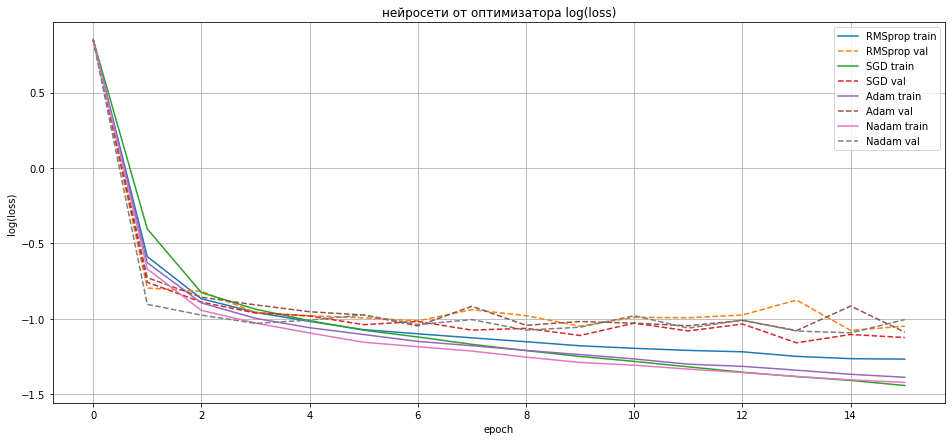

In [30]:
# создаем модель model
model = Sequential(name=f'model_05')
model.add(Dense(128, activation='relu', input_shape=(784,)))  
# входной слой + поносвязный слой из 128 нейронов с активацией ReLU
for k in range(5):
  model.add(Dense(10+(10-k)*10, activation='tanh')) 
  # Скрытый слой k из 10+(10-k)*10 нейронов с активацией tanh
model.add(Dense(10, activation='softmax')) 
# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax



# сохраняем ее веса (это начальная точка) model.save_weights('model_05.h5')
model.save_weights('model_05.h5')

plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 15
# вектор для вывод результатов
epoch = np.arange(epochs+1)

# будем изменять оптимизаторы
for i_optim in [keras.optimizers.RMSprop(),keras.optimizers.SGD( ),keras.optimizers.Adam( ),keras.optimizers.Nadam( )]:
  # создаем рабочую модель modeli куда будем загружать эти вес (она должна быть идентичной структуры)
  modeli = Sequential(name=f'model_05')
  modeli.add(Dense(128, activation='relu', input_shape=(784,)))  
  for k in range(5):
    modeli.add(Dense(10+(10-k)*10, activation='tanh')) 
  modeli.add(Dense(10, activation='softmax')) 

  modeli.load_weights('model_05.h5')
  # компилируем modeli с одним из оптимизаторов
  modeli.compile(
      optimizer=i_optim,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
  # вычисляем ошибку для modeli без обучения
  hh0_tr = modeli.evaluate(  train_images[:48000,:], to_categorical(train_labels[:48000]),verbose = 0)
  hh0_val = modeli.evaluate(  train_images[48000:,:], to_categorical(train_labels[48000:]),verbose = 0)
  # проводим обучение модели 
  hh = modeli.fit(
                  train_images,
                  to_categorical(train_labels),
                  epochs=epochs,
                  batch_size=32, validation_split=0.2, verbose = 0
                  )
  # картинки
  plt.plot(epoch,np.log([hh0_tr[0]]+hh.history['loss']),'-',label = modeli.optimizer.get_config()['name']+' train')
  plt.plot(epoch,np.log([hh0_val[0]]+hh.history['val_loss']),'--',label = modeli.optimizer.get_config()['name']+' val')
plt.legend()
plt.grid('On')

plt.title('нейросети от оптимизатора log(loss)')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()


In [31]:
 modeli.optimizer.get_config()

{'beta_1': 0.9,
 'beta_2': 0.999,
 'decay': 0.004,
 'epsilon': 1e-07,
 'learning_rate': 0.001,
 'name': 'Nadam'}

Посмотрим на результат предсказаний  (inference) для обученной модели (последняя в цикле)

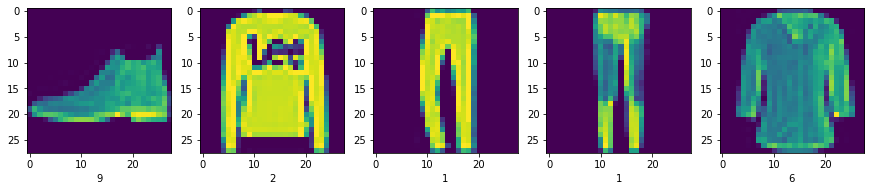

In [32]:
N = 5
y_pred = modeli.predict(test_images[:N,:])
y_pred_class = np.argmax(y_pred,axis=1)
plt.figure(figsize =(3*N,5))
for i in range(N):
  plt.subplot(1,N,i+1)
  plt.imshow(test_images[i,:].reshape(28,28))
  plt.xlabel(str(y_pred_class[i]))
plt.show()  

In [33]:
y_pred_class

array([9, 2, 1, 1, 6])

In [34]:
test_labels[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

Сформируем матрицу ошибок по классам. 

*   Оценим качество модели по каждому классу отдельно (полнота , точность).
*   Сделаем вывод.




In [35]:
y_pred = modeli.predict(test_images[:,:])
y_pred_class = np.argmax(y_pred,axis=1)

In [36]:
set(test_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [49]:
import sklearn.metrics

conf_matrix_list = sklearn.metrics.multilabel_confusion_matrix(test_labels, y_pred_class, labels=[i for i in range(10)])
print(conf_matrix_list)


[[[8802  198]
  [ 169  831]]

 [[8984   16]
  [  33  967]]

 [[8871  129]
  [ 279  721]]

 [[8912   88]
  [ 177  823]]

 [[8713  287]
  [ 157  843]]

 [[8942   58]
  [  52  948]]

 [[8605  395]
  [ 276  724]]

 [[8944   56]
  [  73  927]]

 [[8974   26]
  [  49  951]]

 [[8941   59]
  [  47  953]]]


In [51]:
conf_matrix_list = [np.flip(cm) for cm in conf_matrix_list]
conf_matrix_list

[array([[ 831,  169],
        [ 198, 8802]]), array([[ 967,   33],
        [  16, 8984]]), array([[ 721,  279],
        [ 129, 8871]]), array([[ 823,  177],
        [  88, 8912]]), array([[ 843,  157],
        [ 287, 8713]]), array([[ 948,   52],
        [  58, 8942]]), array([[ 724,  276],
        [ 395, 8605]]), array([[ 927,   73],
        [  56, 8944]]), array([[ 951,   49],
        [  26, 8974]]), array([[ 953,   47],
        [  59, 8941]])]

In [56]:
i=-1
res_dict = {'num_class':[_ for _ in range(10)], 'class_names': class_names, 'precisions': [], 'recalls': []}
for cm in conf_matrix_list:
  i+=1
  tp_and_fn = cm.sum(1)[0]
  tp_and_fp = cm.sum(0)[0]
  tp = cm.diagonal()[0]
  precision = tp / tp_and_fp
  recall = tp / tp_and_fn
  res_dict['precisions'].append(precision)
  res_dict['recalls'].append(recall)
  print(f'для класса {i}:\t{class_names[i]}\n'
  f'precision - {precision}\n'
  f'recall - {recall}')
 

для класса 0:	Футболка / топ
precision - 0.8075801749271136
recall - 0.831
для класса 1:	Шорты
precision - 0.9837232960325534
recall - 0.967
для класса 2:	Свитер
precision - 0.8482352941176471
recall - 0.721
для класса 3:	Платье
precision - 0.9034028540065862
recall - 0.823
для класса 4:	Плащ
precision - 0.7460176991150442
recall - 0.843
для класса 5:	Сандали
precision - 0.9423459244532804
recall - 0.948
для класса 6:	Рубашка
precision - 0.6470062555853441
recall - 0.724
для класса 7:	Кроссовок
precision - 0.943031536113937
recall - 0.927
для класса 8:	Сумка
precision - 0.9733879222108496
recall - 0.951
для класса 9:	Ботинок
precision - 0.941699604743083
recall - 0.953


In [58]:
res_df = pd.DataFrame(res_dict)
res_df

,num_class,class_names,precisions,recalls
0,0,Футболка / топ,0.807580,0.831
1,1,Шорты,0.983723,0.967
2,2,Свитер,0.848235,0.721
3,3,Платье,0.903403,0.823
4,4,Плащ,0.746018,0.843
5,5,Сандали,0.942346,0.948
6,6,Рубашка,0.647006,0.724
7,7,Кроссовок,0.943032,0.927
8,8,Сумка,0.973388,0.951
9,9,Ботинок,0.941700,0.953


Худшее качество предсказания имеет класс 6 - Рубашка

In [62]:
res_df.sort_values('precisions').head(1)

,num_class,class_names,precisions,recalls
6,6,Рубашка,0.647006,0.724


Худшую полнату предсказания имеет класс 2 - Свитер

In [64]:
res_df.sort_values('recalls').head(1)

,num_class,class_names,precisions,recalls
2,2,Свитер,0.848235,0.721


Лучшее качество предсказания имеет класс 1 - Шорты

In [63]:
res_df.sort_values('precisions', ascending=False).head(1)

,num_class,class_names,precisions,recalls
1,1,Шорты,0.983723,0.967


Лучшую полнату предсказания имеет класс 1 - Шорты

In [65]:
res_df.sort_values('recalls', ascending=False).head(1)

,num_class,class_names,precisions,recalls
1,1,Шорты,0.983723,0.967
